In [48]:
import random
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import stats
import plotly.graph_objects as go
import numpy as np
from scipy.stats import fisher_exact

In [25]:
def linear_model(x, a, b):
    return a * x + b

def polynomial_model(x, a, b, c):
    return a * x**2 + b * x + c

def cubic_model(x, a, b, c, d):
    return a * x**3 + b * x**2 + c * x + d

def exponential_model(x, a, b):
    return a * np.exp(b * x)

def logarithmic_model(x, a, b):
    return a * np.log(x) + b

def hyperbolic_model(x, a, b):
    return a / x + b

def fit_and_plot_lists_2(x, y):
    x = np.array(x)
    y = np.array(y)
    
    # Линейная регрессия
    popt_linear, _ = curve_fit(linear_model, x, y)
    linear_fit = linear_model(x, *popt_linear)
    r_squared_linear = stats.linregress(x, y)[2]**2

    # Полиномиальная регрессия (2-й степени)
    popt_poly, _ = curve_fit(polynomial_model, x, y)
    poly_fit = polynomial_model(x, *popt_poly)
    r_squared_poly = 1 - (np.sum((y - poly_fit) ** 2) / np.sum((y - np.mean(y)) ** 2))

    # Кубическая регрессия (3-й степени)
    popt_cubic, _ = curve_fit(cubic_model, x, y)
    cubic_fit = cubic_model(x, *popt_cubic)
    r_squared_cubic = 1 - (np.sum((y - cubic_fit) ** 2) / np.sum((y - np.mean(y)) ** 2))

    # Экспоненциальная регрессия
    popt_exp, _ = curve_fit(exponential_model, x, y)
    exp_fit = exponential_model(x, *popt_exp)
    r_squared_exp = 1 - (np.sum((y - exp_fit) ** 2) / np.sum((y - np.mean(y)) ** 2))

    # Логарифмическая регрессия
    popt_log, _ = curve_fit(logarithmic_model, x, y, bounds=(0, [3., 3.]))
    log_fit = logarithmic_model(x, *popt_log)
    r_squared_log = 1 - (np.sum((y - log_fit) ** 2) / np.sum((y - np.mean(y)) ** 2))

    # Гиперболическая регрессия
    popt_hyper, _ = curve_fit(hyperbolic_model, x, y)
    hyper_fit = hyperbolic_model(x, *popt_hyper)
    r_squared_hyper = 1 - (np.sum((y - hyper_fit) ** 2) / np.sum((y - np.mean(y)) ** 2))

    # Выбор наилучшей модели
    r_squared_values = {
        "linear": r_squared_linear,
        "polynomial": r_squared_poly,
        "cubic": r_squared_cubic,
        "exponential": r_squared_exp,
        "logarithmic": r_squared_log,
        "hyperbolic": r_squared_hyper
    }

    best_fit_type = max(r_squared_values, key=r_squared_values.get)
    best_fit_r_squared = r_squared_values[best_fit_type]

    # Определим лучшие параметры для вывода
    if best_fit_type == "linear":
        best_params = popt_linear
        fit_func = f"{best_params[0]:.4f}x + {best_params[1]:.4f}"
    elif best_fit_type == "polynomial":
        best_params = popt_poly
        fit_func = f"{best_params[0]:.4f}x^2 + {best_params[1]:.4f}x + {best_params[2]:.4f}"
    elif best_fit_type == "cubic":
        best_params = popt_cubic
        fit_func = f"{best_params[0]:.4f}x^3 + {best_params[1]:.4f}x^2 + {best_params[2]:.4f}x + {best_params[3]:.4f}"
    elif best_fit_type == "exponential":
        best_params = popt_exp
        fit_func = f"{best_params[0]:.4f} * e^({best_params[1]:.4f}x)"
    elif best_fit_type == "logarithmic":
        best_params = popt_log
        fit_func = f"{best_params[0]:.4f} * log(x) + {best_params[1]:.4f}"
    elif best_fit_type == "hyperbolic":
        best_params = popt_hyper
        fit_func = f"{best_params[0]:.4f} / x + {best_params[1]:.4f}"

    # График
    plt.scatter(x, y, label='Данные', color='blue')
    if best_fit_type == "linear":
        plt.plot(x, linear_fit, label=f'Линейная: y={fit_func}', color='red')
    elif best_fit_type == "polynomial":
        plt.plot(x, poly_fit, label=f'Полином: y={fit_func}', color='green')
    elif best_fit_type == "cubic":
        plt.plot(x, cubic_fit, label=f'Кубический: y={fit_func}', color='purple')
    elif best_fit_type == "exponential":
        plt.plot(x, exp_fit, label=f'Экспоненциальная: y={fit_func}', color='orange')
    elif best_fit_type == "logarithmic":
        plt.plot(x, log_fit, label=f'Логарифмическая: y={fit_func}', color='brown')
    elif best_fit_type == "hyperbolic":
        plt.plot(x, hyper_fit, label=f'Гиперболическая: y={fit_func}', color='pink')

    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Подгонка данных')
    plt.legend()
    plt.grid()
    plt.show()

    return best_fit_type, best_fit_r_squared, fit_func


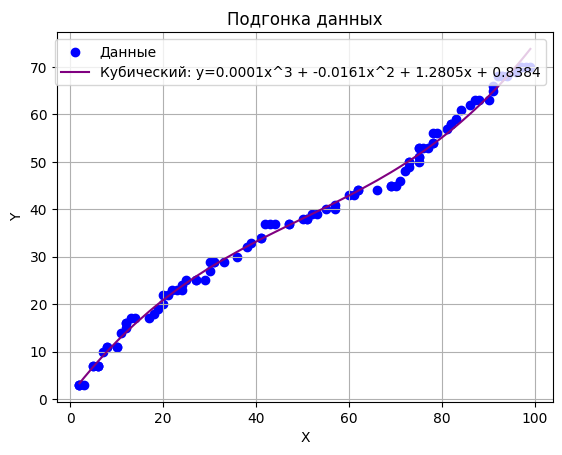

('cubic', 0.9951880075900524, '0.0001x^3 + -0.0161x^2 + 1.2805x + 0.8384')

In [30]:
# Пример использования
x_data = sorted([random.randint(2, 100) for _ in range(100)])
y_data = sorted([random.randint(3, 70) for _ in range(100)])

fit_and_plot_lists_2(x_data, y_data)

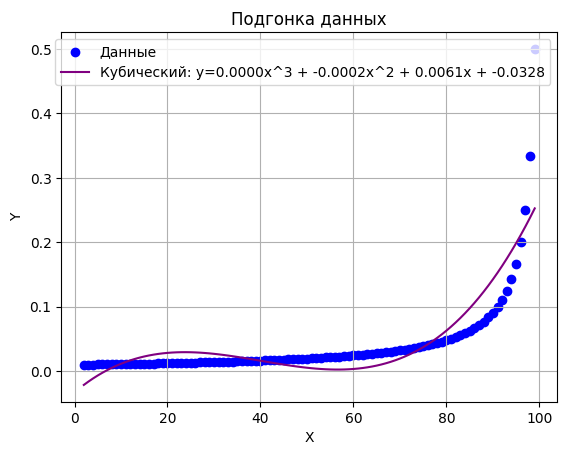

('cubic', 0.7552717049601484, '0.0000x^3 + -0.0002x^2 + 0.0061x + -0.0328')

In [33]:
x_data = sorted([i for i in range(2, 100)])
y_data = sorted([1/i for i in range(2, 100)])
fit_and_plot_lists_2(x_data, y_data)

In [18]:
def linear_model(x, a, b):
    return a * x + b

def polynomial_model(x, a, b, c):
    return a * x**2 + b * x + c

def cubic_model(x, a, b, c, d):
    return a * x**3 + b * x**2 + c * x + d

def exponential_model(x, a, b):
    return a * np.exp(b * x)

def logarithmic_model(x, a, b):
    return a * np.log(x) + b

def hyperbolic_model(x, a, b):
    return a / x + b

def fit_and_plot_lists_3(x, y, x_label='X', y_label='Y'):
    x = np.array(x)
    y = np.array(y)
    
    # Линейная регрессия
    popt_linear, _ = curve_fit(linear_model, x, y)
    linear_fit = linear_model(x, *popt_linear)
    r_squared_linear = stats.linregress(x, y)[2]**2

    # Полиномиальная регрессия (2-й степени)
    popt_poly, _ = curve_fit(polynomial_model, x, y)
    poly_fit = polynomial_model(x, *popt_poly)
    r_squared_poly = 1 - (np.sum((y - poly_fit) ** 2) / np.sum((y - np.mean(y)) ** 2))

    # Кубическая регрессия (3-й степени)
    popt_cubic, _ = curve_fit(cubic_model, x, y)
    cubic_fit = cubic_model(x, *popt_cubic)
    r_squared_cubic = 1 - (np.sum((y - cubic_fit) ** 2) / np.sum((y - np.mean(y)) ** 2))

    # Экспоненциальная регрессия
    popt_exp, _ = curve_fit(exponential_model, x, y)
    exp_fit = exponential_model(x, *popt_exp)
    r_squared_exp = 1 - (np.sum((y - exp_fit) ** 2) / np.sum((y - np.mean(y)) ** 2))

    # Логарифмическая регрессия
    popt_log, _ = curve_fit(logarithmic_model, x, y, bounds=(0, [3., 3.]))
    log_fit = logarithmic_model(x, *popt_log)
    r_squared_log = 1 - (np.sum((y - log_fit) ** 2) / np.sum((y - np.mean(y)) ** 2))

    # Гиперболическая регрессия
    popt_hyper, _ = curve_fit(hyperbolic_model, x, y)
    hyper_fit = hyperbolic_model(x, *popt_hyper)
    r_squared_hyper = 1 - (np.sum((y - hyper_fit) ** 2) / np.sum((y - np.mean(y)) ** 2))

    # Выбор наилучшей модели
    r_squared_values = {
        "linear": r_squared_linear,
        "polynomial": r_squared_poly,
        "cubic": r_squared_cubic,
        "exponential": r_squared_exp,
        "logarithmic": r_squared_log,
        "hyperbolic": r_squared_hyper
    }
    print(r_squared_values)
    best_fit_type = max(r_squared_values, key=r_squared_values.get)
    best_fit_r_squared = r_squared_values[best_fit_type]

    # Определим лучшие параметры для вывода
    if best_fit_type == "linear":
        best_params = popt_linear
        fit_func = f"{best_params[0]:.4f}x + {best_params[1]:.4f}"
    elif best_fit_type == "polynomial":
        best_params = popt_poly
        fit_func = f"{best_params[0]:.4f}x^2 + {best_params[1]:.4f}x + {best_params[2]:.4f}"
    elif best_fit_type == "cubic":
        best_params = popt_cubic
        fit_func = f"{best_params[0]:.4f}x^3 + {best_params[1]:.4f}x^2 + {best_params[2]:.4f}x + {best_params[3]:.4f}"
    elif best_fit_type == "exponential":
        best_params = popt_exp
        fit_func = f"{best_params[0]:.4f} * e^({best_params[1]:.4f}x)"
    elif best_fit_type == "logarithmic":
        best_params = popt_log
        fit_func = f"{best_params[0]:.4f} * log(x) + {best_params[1]:.4f}"
    elif best_fit_type == "hyperbolic":
        best_params = popt_hyper
        fit_func = f"{best_params[0]:.4f} / x + {best_params[1]:.4f}"

    # График с использованием Plotly
    fig = go.Figure()

    # Добавляем данные
    fig.add_trace(go.Scatter(x=x, y=y, mode='markers', name='Данные', marker=dict(color='blue')))

    # Добавляем лучшую подгонку
    if best_fit_type == "linear":
        fig.add_trace(go.Scatter(x=x, y=linear_fit, mode='lines', name=f'Линейная: y={fit_func}', line=dict(color='red')))
    elif best_fit_type == "polynomial":
        fig.add_trace(go.Scatter(x=x, y=poly_fit, mode='lines', name=f'Полином: y={fit_func}', line=dict(color='green')))
    elif best_fit_type == "cubic":
        fig.add_trace(go.Scatter(x=x, y=cubic_fit, mode='lines', name=f'Кубический: y={fit_func}', line=dict(color='purple')))
    elif best_fit_type == "exponential":
        fig.add_trace(go.Scatter(x=x, y=exp_fit, mode='lines', name=f'Экспоненциальная: y={fit_func}', line=dict(color='orange')))
    elif best_fit_type == "logarithmic":
        fig.add_trace(go.Scatter(x=x, y=log_fit, mode='lines', name=f'Логарифмическая: y={fit_func}', line=dict(color='brown')))
    elif best_fit_type == "hyperbolic":
        fig.add_trace(go.Scatter(x=x, y=hyper_fit, mode='lines', name=f'Гиперболическая: y={fit_func}', line=dict(color='pink')))

    # Настройки графика
    fig.update_layout(
        title='Подгонка данных',
        xaxis_title=x_label,  # Используем имя переменной для подписи оси X
        yaxis_title=y_label,  # Используем имя переменной для подписи оси Y
        legend=dict(x=0, y=1),
        template='plotly_white'
    )

    # Показываем график
    fig.show()

    return best_fit_type, best_fit_r_squared, fit_func


In [6]:
K2065G_2_POROSITY = [0.1702211499, 0.1692114919, 0.1682019383, 0.1682019383, 0.1676971763, 0.1666875035, 0.1651730686, 0.1641634107, 0.1631538719, 0.1626489758, 0.1621442139, 0.1621442139, 0.1626489758, 0.1631538719, 0.1631538719, 0.1631538719, 0.1626489758, 0.1626489758, 0.1626489758, 0.1621442139, 0.1611346602, 0.1611346602, 0.1616394371, 0.1616394371, 0.1611346602, 0.1616394371, 0.1611346602, 0.1611346602, 0.1606297791, 0.1606297791, 0.1606297791, 0.1596202254, 0.1596202254, 0.1596202254, 0.1591153443, 0.1586105675, 0.1591153443, 0.1596202254, 0.1591153443, 0.1586105675, 0.1586105675, 0.1591153443, 0.1591153443, 0.1586105675, 0.1586105675, 0.1586105675, 0.1586105675, 0.1586105675, 0.1586105675, 0.1591153443, 0.1591153443, 0.1601250023, 0.1611346602, 0.1616394371, 0.1636586487, 0.1641634107, 0.1656778455, 0.1676971763, 0.1682019383, 0.1707259119, 0.1712308079, 0.1727452427, 0.1747644544, 0.1757739931, 0.1757739931, 0.1762788892, 0.1757739931, 0.1757739931, 0.1747644544, 0.1737547815, 0.1737547815, 0.1732500196, 0.1727452427, 0.1732500196, 0.1737547815, 0.1732500196, 0.1737547815, 0.1727452427, 0.1722403467, 0.1717355847, 0.1707259119, 0.1702211499, 0.1692114919, 0.1697163731, 0.1692114919, 0.1687067151, 0.1687067151, 0.1692114919, 0.1682019383, 0.1676971763, 0.1661827415, 0.1651730686, 0.1641634107, 0.1631538719, 0.1616394371, 0.1611346602, 0.1601250023, 0.1606297791, 0.1601250023, 0.1601250023]
K2065G_2_PERMEABILITY = [5.305978775, 4.8371400833, 4.4056649208, 4.4056649208, 4.2031207085, 3.8228139877, 3.3101279736, 3.0036234856, 2.7229943275, 2.5917332172, 2.4662578106, 2.4662578106, 2.5917332172, 2.7229943275, 2.7229943275, 2.7229943275, 2.5917332172, 2.5917332172, 2.5917332172, 2.4662578106, 2.2316713333, 2.2316713333, 2.3463072777, 2.3463072777, 2.2316713333, 2.3463072777, 2.2316713333, 2.2316713333, 2.1221199036, 2.1221199036, 2.1221199036, 1.917586565, 1.917586565, 1.917586565, 1.8221800327, 1.7311353683, 1.8221800327, 1.917586565, 1.8221800327, 1.7311353683, 1.7311353683, 1.8221800327, 1.8221800327, 1.7311353683, 1.7311353683, 1.7311353683, 1.7311353683, 1.7311353683, 1.7311353683, 1.8221800327, 1.8221800327, 2.0174975395, 2.2316713333, 2.3463072777, 2.860203743, 3.0036234856, 3.4736862183, 4.2031207085, 4.4056649208, 5.5551991463, 5.8148417473, 6.6594138145, 7.9533457756, 8.6795578003, 8.6795578003, 9.0640964508, 8.6795578003, 8.6795578003, 7.9533457756, 7.2810263634, 7.2810263634, 6.9641022682, 6.6594138145, 6.9641022682, 7.2810263634, 6.9641022682, 7.2810263634, 6.6594138145, 6.3665060997, 6.0851373672, 5.5551991463, 5.305978775, 4.8371400833, 5.0667529106, 4.8371400833, 4.6169013977, 4.6169013977, 4.8371400833, 4.4056649208, 4.2031207085, 3.6445188522, 3.3101279736, 3.0036234856, 2.7229943275, 2.3463072777, 2.2316713333, 2.0174975395, 2.1221199036, 2.0174975395, 2.0174975395]

In [19]:
fit_and_plot_lists_3(K2065G_2_POROSITY, K2065G_2_PERMEABILITY, "K2065G_2_POROSITY", "K2065G_2_PERMEABILITY")

{'linear': 0.9671145238361347, 'polynomial': 0.999563208419152, 'cubic': 0.9999983479772305, 'exponential': 0.9995336795804329, 'logarithmic': -0.13138530005898685, 'hyperbolic': 0.9573256280899538}


('cubic',
 0.9999983479772305,
 '378997.4291x^3 + -173843.3819x^2 + 26724.7638x + -1375.9510')

In [16]:
K2066G_2_POROSITY = [0.1899086684, 0.1899086684, 0.1894038916, 0.1878894567, 0.1863750219, 0.185365364, 0.1843558252, 0.1838509291, 0.1823364943, 0.1818317324, 0.1818317324, 0.1818317324, 0.1813269556, 0.1813269556, 0.1818317324, 0.1818317324, 0.1813269556, 0.1813269556, 0.1813269556, 0.1803172976, 0.1798125207, 0.1782980859, 0.1782980859, 0.1808220595, 0.1813269556, 0.1818317324, 0.1833461523, 0.1838509291, 0.1843558252, 0.1843558252, 0.1843558252, 0.1843558252, 0.1838509291, 0.1818317324, 0.1823364943, 0.1828413904, 0.1833461523, 0.1838509291, 0.1843558252, 0.1843558252, 0.1843558252, 0.1838509291, 0.1833461523, 0.1823364943, 0.1818317324, 0.1818317324, 0.1813269556, 0.1808220595, 0.1803172976, 0.1798125207, 0.1793077439, 0.1788028628, 0.1777933091, 0.1767836511, 0.1772884279, 0.1782980859, 0.1793077439, 0.1813269556, 0.1833461523, 0.1848605871, 0.1863750219, 0.1878894567, 0.1894038916, 0.1904134303, 0.1904134303, 0.1909183264, 0.1914231032, 0.1914231032, 0.1909183264, 0.1909183264, 0.1909183264, 0.1909183264, 0.1909183264, 0.1914231032, 0.1919278651, 0.192432642, 0.192937538, 0.1934423, 0.1944519728, 0.1949567348, 0.1964711696, 0.1974807084, 0.1979856044, 0.1989951432, 0.1989951432, 0.1989951432, 0.1989951432, 0.1989951432, 0.1984903812, 0.1979856044, 0.1979856044, 0.1974807084, 0.1974807084, 0.1969759464, 0.1969759464, 0.1964711696, 0.1964711696, 0.1964711696, 0.1964711696, 0.1964711696]


In [20]:
fit_and_plot_lists_3(K2065G_2_POROSITY, K2066G_2_POROSITY, "K2065G_2_POROSITY", "K2066G_2_POROSITY")

{'linear': 0.28768975340019315, 'polynomial': 0.3045806798854077, 'cubic': 0.3440804803062085, 'exponential': 0.2866250801238843, 'logarithmic': 0.28940184350188114, 'hyperbolic': 0.2909606800396487}


('cubic',
 0.3440804803062085,
 '-11352.5525x^3 + 5648.5335x^2 + -935.5703x + 51.7721')

In [61]:
def Fisher (list1, list2):
    # Преобразование списков в бинарные значения
    # 1 - если значение положительное, 0 - если значение отрицательное или ноль
    binary_list1 = [1 if x > 0 else 0 for x in list1]
    binary_list2 = [1 if x > 0 else 0 for x in list2]

    # Создание таблицы сопряженности
    success_1 = sum(binary_list1)  # Количество успехов в первом списке
    failure_1 = len(binary_list1) - success_1  # Количество неудач в первом списке
    success_2 = sum(binary_list2)  # Количество успехов во втором списке
    failure_2 = len(binary_list2) - success_2  # Количество неудач во втором списке

    # Создаем таблицу сопряженности 2x2
    contingency_table = np.array([[success_1, failure_1],
                               [success_2, failure_2]])

    # Выполнение теста Фишера
    odds_ratio, p_value = fisher_exact(contingency_table)

    # Вывод результатов
    print("Таблица сопряженности:")
    print(contingency_table)
    print(f"Отношение шансов: {odds_ratio}")
    print(f"p-значение: {p_value}")

    # Интерпретация результата
    alpha = 0.05
    if p_value < alpha:
        print("Отвергаем нулевую гипотезу: существует статистически значимая связь между двумя списками.")
        return 1
    else:
        print("Не удается отвергнуть нулевую гипотезу: нет статистически значимой связи между двумя списками.")
        return 0


In [58]:
def linear_model(x, a, b):
    return a * x + b

def polynomial_model(x, a, b, c):
    return a * x**2 + b * x + c

def cubic_model(x, a, b, c, d):
    return a * x**3 + b * x**2 + c * x + d

def exponential_model(x, a, b):
    return a * np.exp(b * x)

def logarithmic_model(x, a, b):
    return a * np.log(x) + b

def hyperbolic_model(x, a, b):
    return a / x + b

#Остаточная сумма
def SSR(a, b):
    s = 0
    for i in range(len(a)):
        s += (a[i] - b[i])**2
    return s/(len(a)-2)

def fit_and_plot_lists_6(x, y, x_label='X', y_label='Y', confidence_interval=0.95):
    x = np.array(x)
    y = np.array(y)

    # Линейная регрессия
    popt_linear, _ = curve_fit(linear_model, x, y)
    linear_fit = linear_model(x, *popt_linear)
    r_squared_linear = stats.linregress(x, y)[2]**2
    linear_ = f"{popt_linear[0]:.4f}x + {popt_linear[1]:.4f}"
    linear_SSR = SSR(y, linear_fit)
    
    # Полиномиальная регрессия (2-й степени)
    popt_poly, _ = curve_fit(polynomial_model, x, y)
    poly_fit = polynomial_model(x, *popt_poly)
    r_squared_poly = 1 - (np.sum((y - poly_fit) ** 2) / np.sum((y - np.mean(y)) ** 2))
    poly_ = f"{popt_poly[0]:.4f}x^2 + {popt_poly[1]:.4f}x + {popt_poly[2]:.4f}"
    poly_SSR = SSR(y, poly_fit)
    
    # Кубическая регрессия (3-й степени)
    popt_cubic, _ = curve_fit(cubic_model, x, y)
    cubic_fit = cubic_model(x, *popt_cubic)
    r_squared_cubic = 1 - (np.sum((y - cubic_fit) ** 2) / np.sum((y - np.mean(y)) ** 2))
    cubic_ = f"{popt_cubic[0]:.4f}x^3 + {popt_cubic[1]:.4f}x^2 + {popt_cubic[2]:.4f}x + {popt_cubic[3]:.4f}"
    cubic_SSR = SSR(y, cubic_fit)

    # Экспоненциальная регрессия
    popt_exp, _ = curve_fit(exponential_model, x, y)
    exp_fit = exponential_model(x, *popt_exp)
    r_squared_exp = 1 - (np.sum((y - exp_fit) ** 2) / np.sum((y - np.mean(y)) ** 2))
    exp_ = f"{popt_exp[0]:.4f} * e^({popt_exp[1]:.4f}x)"
    exp_SSR = SSR(y, exp_fit)
    
    # Логарифмическая регрессия
    popt_log, _ = curve_fit(logarithmic_model, x, y, bounds=(0, [3., 3.]))
    log_fit = logarithmic_model(x, *popt_log)
    r_squared_log = 1 - (np.sum((y - log_fit) ** 2) / np.sum((y - np.mean(y)) ** 2))
    log_ = f"{popt_log[0]:.4f} * log(x) + {popt_log[1]:.4f}"
    log_SSR = SSR(y, log_fit)

    # Гиперболическая регрессия
    popt_hyper, _ = curve_fit(hyperbolic_model, x, y)
    hyper_fit = hyperbolic_model(x, *popt_hyper)
    r_squared_hyper = 1 - (np.sum((y - hyper_fit) ** 2) / np.sum((y - np.mean(y)) ** 2))
    hyper_ = f"{popt_hyper[0]:.4f} / x + {popt_hyper[1]:.4f}"
    hyper_SSR = SSR(y, hyper_fit)

    # Выбор наилучшей модели
    r_squared_values = {
        "linear": r_squared_linear,
        "polynomial": r_squared_poly,
        "cubic": r_squared_cubic,
        "exponential": r_squared_exp,
        "logarithmic": r_squared_log,
        "hyperbolic": r_squared_hyper
    }
    
    best_fit_type = max(r_squared_values, key=r_squared_values.get)
    best_fit_r_squared = r_squared_values[best_fit_type]

    # Определим лучшие параметры для вывода
    fit_func = ''
    fit_data = None
    if best_fit_type == "linear":
        best_params = popt_linear
        fit_func = f"{best_params[0]:.4f}x + {best_params[1]:.4f}"
        fit_data = linear_fit
    elif best_fit_type == "polynomial":
        best_params = popt_poly
        fit_func = f"{best_params[0]:.4f}x^2 + {best_params[1]:.4f}x + {best_params[2]:.4f}"
        fit_data = poly_fit
    elif best_fit_type == "cubic":
        best_params = popt_cubic
        fit_func = f"{best_params[0]:.4f}x^3 + {best_params[1]:.4f}x^2 + {best_params[2]:.4f}x + {best_params[3]:.4f}"
        fit_data = cubic_fit
    elif best_fit_type == "exponential":
        best_params = popt_exp
        fit_func = f"{best_params[0]:.4f} * e^({best_params[1]:.4f}x)"
        fit_data = exp_fit
    elif best_fit_type == "logarithmic":
        best_params = popt_log
        fit_func = f"{best_params[0]:.4f} * log(x) + {best_params[1]:.4f}"
        fit_data = log_fit
    elif best_fit_type == "hyperbolic":
        best_params = popt_hyper
        fit_func = f"{best_params[0]:.4f} / x + {best_params[1]:.4f}"
        fit_data = hyper_fit

    # Создаем графики для каждой модели
    models = {
        "linear": (linear_fit, linear_, linear_SSR,  'Линейная', 'red', r_squared_linear),
        "polynomial": (poly_fit, poly_, poly_SSR, 'Полином', 'green', r_squared_poly),
        "cubic": (cubic_fit, cubic_, cubic_SSR, 'Кубический', 'purple', r_squared_cubic),
        "exponential": (exp_fit, exp_, exp_SSR, 'Экспоненциальная', 'orange', r_squared_exp),
        "logarithmic": (log_fit, log_, log_SSR, 'Логарифмическая', 'brown', r_squared_log),
        "hyperbolic": (hyper_fit, hyper_, hyper_SSR, 'Гиперболическая', 'pink', r_squared_hyper)
    }

    for model_type, (fit_data, funck, ssr, name, color, r_squared) in models.items():
        fig = go.Figure()
        fig.add_trace(go.Scatter(x=x, y=y, mode='markers', name='Данные', marker=dict(color='blue')))
        fig.add_trace(go.Scatter(x=x, y=fit_data, mode='lines', name=f'{name}: y={funck}, R²={r_squared:.4f}, SSR = {round(ssr, 3)}', line=dict(color=color)))

        # Вычисление доверительного интервала
        residuals = y - fit_data
        std_error = np.std(residuals)
        n = len(y)
        t_value = stats.t.ppf((1 + confidence_interval) / 2, n - len(best_params))
        margin_of_error = t_value * std_error

        # Верхняя и нижняя границы доверительного интервала
        lower_bound = fit_data - margin_of_error
        upper_bound = fit_data + margin_of_error

        # Добавление доверительного интервала на график 
        fig.add_trace(go.Scatter(x=x, y=lower_bound, mode='lines', name='Нижняя граница', line=dict(color='lightgrey', dash='dash')))
        fig.add_trace(go.Scatter(x=x, y=upper_bound, mode='lines', name='Верхняя граница', line=dict(color='lightgrey', dash='dash')))


        # Настройки графика
        fig.update_layout(
            title=f'Предполагаемая модель - {name}',
            xaxis_title=x_label,
            yaxis_title=y_label,
            legend=dict(x=1.05, y=1, traceorder='normal', orientation='v'),
            template='plotly_white'
        )

        # Показываем график
        fig.show()
    print(r_squared_values)
    return best_fit_type, best_fit_r_squared, fit_func

In [59]:
fit_and_plot_lists_6(K2065G_2_POROSITY, K2065G_2_PERMEABILITY, "K2065G_2_POROSITY", "K2065G_2_PERMEABILITY")

{'linear': 0.9671145238361347, 'polynomial': 0.999563208419152, 'cubic': 0.9999983479772305, 'exponential': 0.9995336795804329, 'logarithmic': -0.13138530005898685, 'hyperbolic': 0.9573256280899538}


('cubic',
 0.9999983479772305,
 '378997.4291x^3 + -173843.3819x^2 + 26724.7638x + -1375.9510')

In [60]:
fit_and_plot_lists_6(K2065G_2_POROSITY, K2066G_2_POROSITY, "K2065G_2_POROSITY", "K2066G_2_POROSITY")

{'linear': 0.28768975340019315, 'polynomial': 0.3045806798854077, 'cubic': 0.3440804803062085, 'exponential': 0.2866250801238843, 'logarithmic': 0.28940184350188114, 'hyperbolic': 0.2909606800396487}


('cubic',
 0.3440804803062085,
 '-11352.5525x^3 + 5648.5335x^2 + -935.5703x + 51.7721')

In [62]:
ss = Fisher(K2065G_2_POROSITY, K2066G_2_POROSITY)


Таблица сопряженности:
[[100   0]
 [100   0]]
Отношение шансов: nan
p-значение: 1.0
Не удается отвергнуть нулевую гипотезу: нет статистически значимой связи между двумя списками.


In [63]:
ss_2 = Fisher(K2065G_2_POROSITY, K2065G_2_PERMEABILITY)

Таблица сопряженности:
[[100   0]
 [100   0]]
Отношение шансов: nan
p-значение: 1.0
Не удается отвергнуть нулевую гипотезу: нет статистически значимой связи между двумя списками.
